In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import read_log

In [2]:
def clean_list(lis):
    return [el for el in lis if el != '']

In [4]:
sandbox, activities, trades = read_log('../data/logs/round_1/ee97218c-670c-4ed2-b34d-fcf2df2462fa.log')

In [8]:
activities

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.0
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.0
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.0
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0.0
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1620.0
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.0
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,1620.0


In [14]:
prices = activities[activities['product'] == 'SQUID_INK']['mid_price'].to_numpy()
logr = np.log(prices[1:] / prices[:-1])

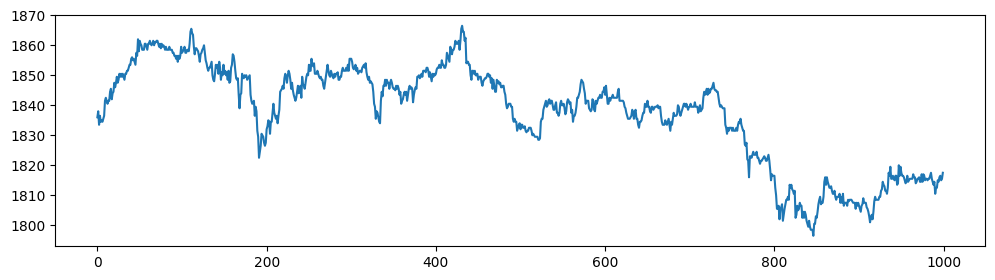

In [15]:
plt.figure(figsize=(12, 3))
plt.plot(prices)
plt.show()

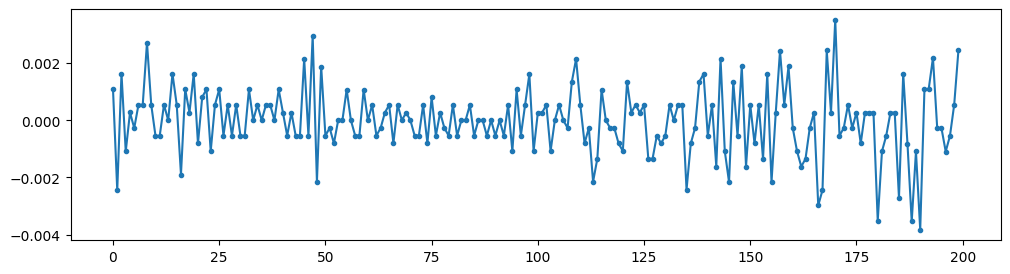

In [19]:
plt.figure(figsize=(12, 3))
plt.plot(logr[:200], marker='.')
plt.show()

In [31]:
for i in range(100):
    # print(clean_list(sandbox['lambdaLog'].iloc[i].split('---')[0].split('\n')))
    print(clean_list(sandbox['lambdaLog'].iloc[i].split('---')[1].split('\n')))

['RAINFOREST_RESIN position: 0', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -50 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['RAINFOREST_RESIN position: -2', 'RAINFOREST_RESIN fair value: 10000', 'BUY: 50 @ 9998', 'SELL: -48 @ 10002']
['

In [54]:
activities

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,17.361328
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.000000
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,1213.841797
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,2978.000000
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,1213.220703
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,1214.496094


In [27]:
activities[activities['product'] == 'KELP'].head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,17.361328
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,18.537109
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,17.210938
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,19.609375
10,-1,500,KELP,2025,30,NaN,NaN,NaN,NaN,2028,30,NaN,NaN,NaN,NaN,2026.5,23.187500
13,-1,600,KELP,2026,5,2025.0,31.0,NaN,NaN,2028,25,NaN,NaN,NaN,NaN,2027.0,26.734375
14,-1,700,KELP,2025,2,2024.0,23.0,NaN,NaN,2028,23,NaN,NaN,NaN,NaN,2026.5,32.113281
17,-1,800,KELP,2024,1,2023.0,29.0,NaN,NaN,2027,30,NaN,NaN,NaN,NaN,2025.5,41.849609
18,-1,900,KELP,2024,23,NaN,NaN,NaN,NaN,2027,23,NaN,NaN,NaN,NaN,2025.5,34.443359
